# APRENDIZAJE ESTADISTICO TAREA 1
# Por: Julian Andres Montoya Carvajal
# C.C 1214727927

![](https://www.circulomarketingla.com/wp-content/uploads/2016/11/Redes-Sociales-Valor-Bolsa-750x498.jpg)

# Contenido :

* [Introduccion](#item1)
* [Librerias](#item2)
* [Importar y concatenar datos](#item3)
* [Analisis exploratorio de datos (EDA)](#item4)
* [Primer entrenamiento](#item5)
* [Agregando predictores](#item6)
* [Experimento](#item7)
* [Modelo final](#item8)

<a name=item1></a>
## Introduccion

**Objetivo**: Entrenar un modelo de regresión lineal para predecir el consumo de energía de un edificio de retail conocida la temperatura ambiente

**Informacion:**
Tendremos un conjuntos de datos de consumo de energía a largo plazo y temperatura del aire exterior para 5 edificios comerciales

**Datos:**
 Fecha y hora (Timestamp), temperatura del aire exterior (OAT (F)) y Consumo de energía por hora (Power (kW))  

|Timestamp (Fecha y hora)|OAT (F) (Temperatura del aire exterior en Farenheit)|Power (kW) (Consumo por hora en KW)|
|:-----:|:--------:|:-------:|
|1/1/2010 1:15|51|165.1|
|....|....|....|
|....|....|....|
|12/31/2010 0:00|	68|	234.5|

<a name=item2></a>
## Librerias

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

<a name=item3></a>
## Importar y concatenar datos 

In [2]:
def subirfyle(n):
    # n es el numero de archivos a subir
    # Los siguientes string parte1 y parte2 cambian dependiendo del nombre o ruta del archivo
    
    parte1="building" #String1 particular del nombre del archivo
    parte2="retail.csv" #String2 particular del nombre del archivo    
    CD=dict(("Datos"+str(i+1),pd.read_csv(parte1+str(i+1)+parte2)) for i in range(n)) #diccionario
    return CD

Datos=subirfyle(5) #llamamos la funcion subirfyle

In [3]:
DT=pd.concat(Datos.values(),ignore_index=True)
DT

,Timestamp,OAT (F),Power (kW)
0,1/1/2010 1:15,51,165.1
1,1/1/2010 1:30,51,151.6
2,1/1/2010 1:45,51,146.9
3,1/1/2010 2:00,51,153.7
4,1/1/2010 2:15,51,153.8
...,...,...,...
174695,12/30/2010 23:00,67,333.7
174696,12/30/2010 23:15,68,221.0
174697,12/30/2010 23:30,68,235.7
174698,12/30/2010 23:45,68,227.2


<a name=item4></a>
## Analisis exploratorio de datos (EDA)

In [4]:
DT["Timestamp"]=pd.to_datetime(DT["Timestamp"]) #Convertir a formato de fecha
BD=DT.set_index("Timestamp") # Ubicar columna temporal como indices
BD

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8
...,...,...
2010-12-30 23:00:00,67,333.7
2010-12-30 23:15:00,68,221.0
2010-12-30 23:30:00,68,235.7


In [5]:
BD.head() #muestra el encabezado

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8


In [6]:
BD.info() #muestra informacion mas detallada

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174700 entries, 2010-01-01 01:15:00 to 2010-12-31 00:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   OAT (F)     174700 non-null  int64  
 1   Power (kW)  174700 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.0 MB


In [7]:
BD.describe() #da una descripcion de los datos y unas medidas

,OAT (F),Power (kW)
count,174700.000000,174700.000000
mean,61.027934,279.818650
std,16.250278,89.332393
min,0.000000,0.000000
25%,52.000000,207.300000
50%,61.000000,283.100000
75%,73.000000,340.125000
max,102.000000,558.100000


In [8]:
print(BD.isnull().any()) # Vemos si hay datos faltantes

OAT (F)       False
Power (kW)    False
dtype: bool


**Concluimos que no hay valores faltantes**

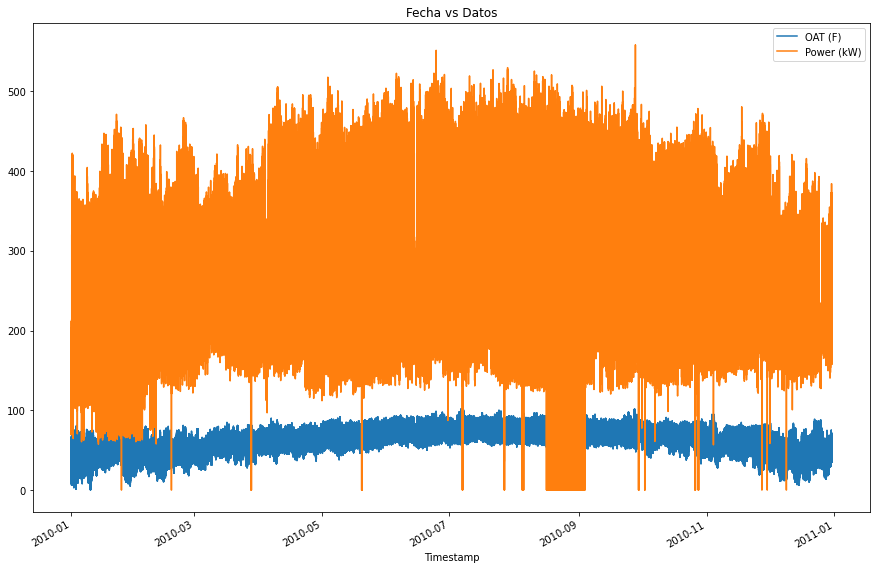

In [9]:
BD.plot(figsize=(15,10),title="Fecha vs Datos")
plt.show()

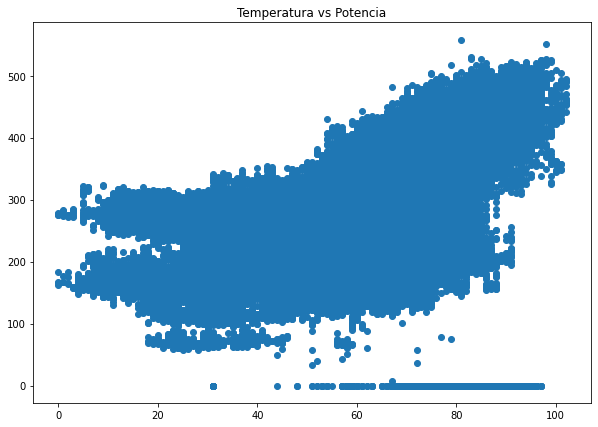

In [10]:
#Grafica de temperatura vs potencia
plt.figure(figsize=(10,7))
plt.title("Temperatura vs Potencia")
plt.scatter(BD["OAT (F)"],BD["Power (kW)"])
plt.show()

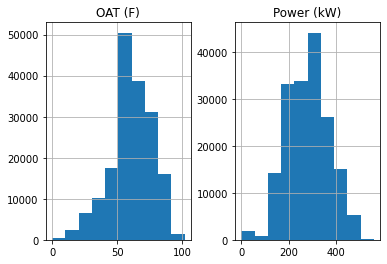

In [11]:
# Comportamiento de los datos
BD.hist()
plt.show()

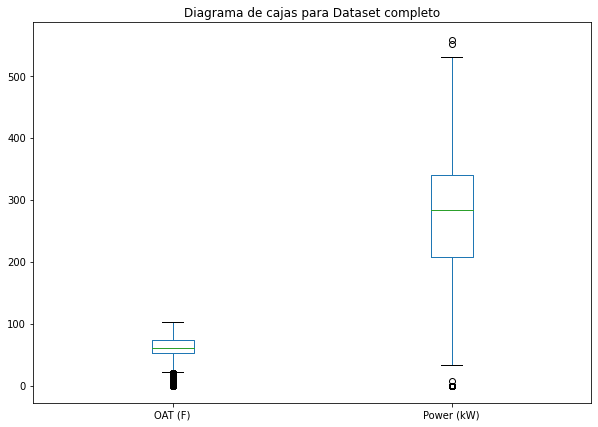

In [12]:
# Diagrama de cajas para outliers
# Valores atípicos univariados
BD.plot(kind="box",figsize=(10,7),title="Diagrama de cajas para Dataset completo")
plt.show()

## Regla de las 3 desviaciones estandar
$$ Z= \frac{X-\mu}{\sigma} \hspace {1cm}(Puntaje)$$

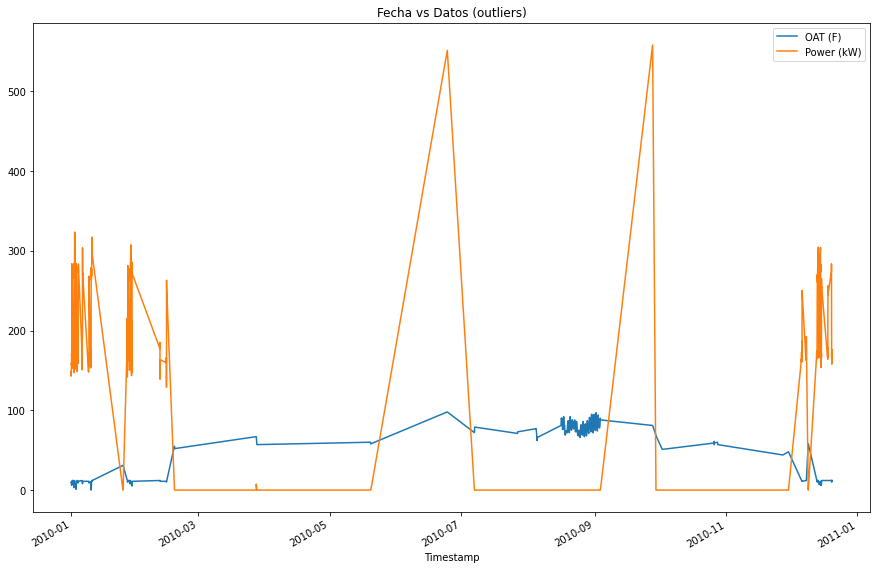

In [13]:
## Regla de las 3 desviaciones estandar para limpiar los datos
std_dev=3
outliers=(np.abs(stats.zscore(BD))>std_dev).any(axis=1) #los que son True corresponden a los outliers
BD_sucio1=BD[outliers]
BD_sucio1.plot(figsize=(15,10),title="Fecha vs Datos (outliers)")
plt.show()

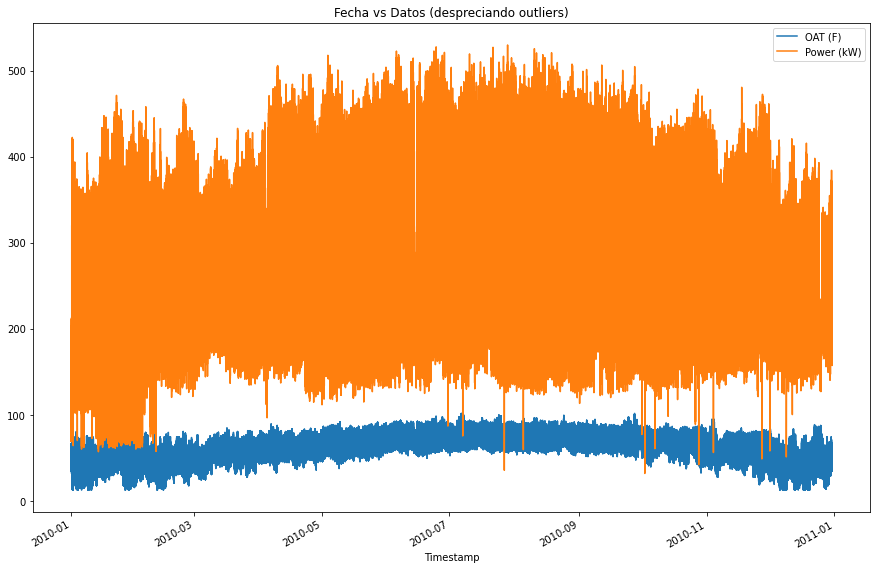

In [14]:
BD_limpio1=BD[~outliers] #los que son True corresponden a los datos correctos
BD_limpio1.plot(figsize=(15,10),title="Fecha vs Datos (despreciando outliers)")
plt.show()

In [15]:
print("Dataframe sin outliers \n",BD_limpio1)
print("Dataframe con outliers \n",BD_sucio1)

Dataframe sin outliers 
                      OAT (F)  Power (kW)
Timestamp                               
2010-01-01 01:15:00       51       165.1
2010-01-01 01:30:00       51       151.6
2010-01-01 01:45:00       51       146.9
2010-01-01 02:00:00       51       153.7
2010-01-01 02:15:00       51       153.8
...                      ...         ...
2010-12-30 23:00:00       67       333.7
2010-12-30 23:15:00       68       221.0
2010-12-30 23:30:00       68       235.7
2010-12-30 23:45:00       68       227.2
2010-12-31 00:00:00       68       234.5

[172034 rows x 2 columns]
Dataframe con outliers 
                      OAT (F)  Power (kW)
Timestamp                               
2010-02-18 00:00:00       55         0.0
2010-02-18 00:15:00       54         0.0
2010-02-18 00:30:00       54         0.0
2010-02-18 00:45:00       54         0.0
2010-02-18 01:00:00       54         0.0
...                      ...         ...
2010-12-20 05:15:00       12       175.6
2010-12-20 05:30:00  

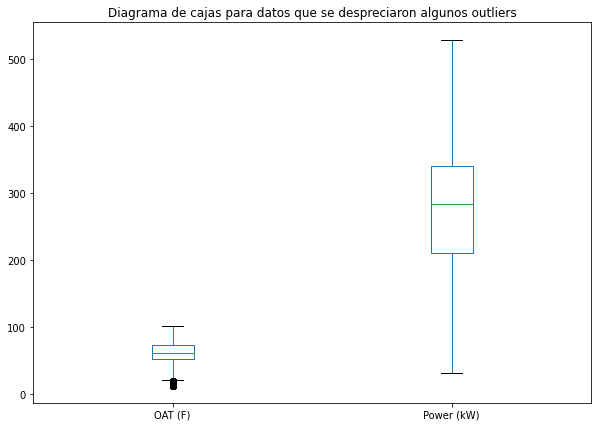

In [16]:
BD_limpio1.plot(kind="box",figsize=(10,7),title="Diagrama de cajas para datos que se despreciaron algunos outliers")
plt.show()

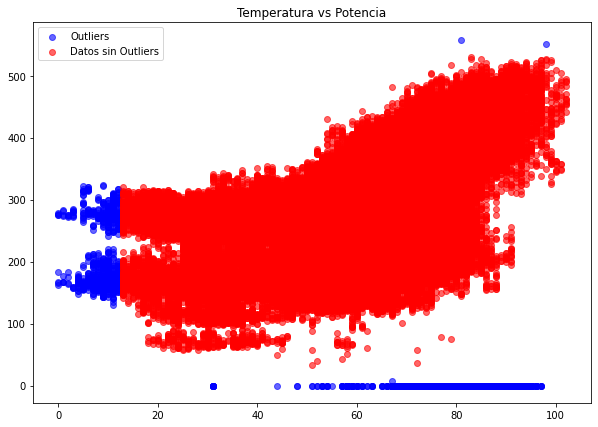

In [17]:
#Grafica de temperatura vs potencia
plt.figure(figsize=(10,7))
plt.title("Temperatura vs Potencia")
plt.scatter(BD_sucio1["OAT (F)"],BD_sucio1["Power (kW)"],color="blue", alpha=0.6,label="Outliers")
plt.scatter(BD_limpio1["OAT (F)"],BD_limpio1["Power (kW)"],color="red", alpha=0.6,label="Datos sin Outliers")
plt.legend()
plt.show()

___

## Estrategia para limpieza de datos IQR (Rango inter cuartil).

La estrategia IQR consiste en hallar el intervalo IQR el cual se encuentra entre el primer cuartil y el tercer cuartil, una vez hallado este rango inter cuartil procedemos a encontrar los limites inferior y superior del rango intercuartil el cual se halla de la siguiente manera:

$$ limite \space inferior= Q_1-1.5 * IQR, limite \space superior= Q_3+1.5 * IQR$$

Una vez hemos obtenido los limites procedemos a encontrar los bigotes inferior y superior los cuales son los valores extremos.

Y finalmente aquellos valores que superan los bigotes inferior y superior los consideramos outliers y son despreciados.

Note que con este metodo no se halla el puntaje en unidades de desviacion estandar como en el metodo anterior.

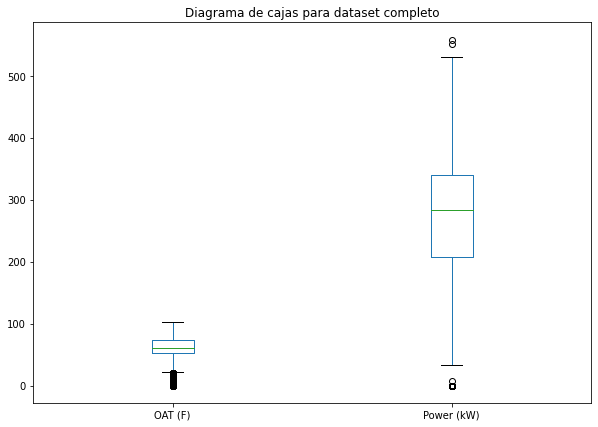

In [18]:
# Diagrama de cajas para outliers
# Valores atípicos univariados
BD.plot(kind="box",figsize=(10,7),title="Diagrama de cajas para dataset completo")
plt.show()

**IQR**

In [19]:
Q1T=BD["OAT (F)"].quantile(0.25) #Calculamos el primer cuartil para la temperatura
Q1P=BD["Power (kW)"].quantile(0.25) #Calculamos el primer cuartil para la potencia

Q2T=BD.median()[0] # mediana de la temperatura
Q2P=BD.median()[1] # mediana de la potencia

Q3T=BD["OAT (F)"].quantile(0.75) #Calculamos el tercer cuartil para la temperatura
Q3P=BD["Power (kW)"].quantile(0.75) #Calculamos el tercer cuartil para la potencia

IQRT=Q3T-Q1T # calculamos el rango inter cuartil para la temperatura
IQRP=Q3P-Q1P # calculamos el rango inter cuartil para la potencia


infT= Q1T-1.5*IQRT # limite inferior para la temperatura
supT= Q3T+1.5*IQRT # limite superior para la temperatura

minT= BD["OAT (F)"].min() #valor minimo de la temperatura
maxT=BD["OAT (F)"].max() # valor maximo de la temperatura

if minT <= infT:
    bigoteinfT=infT #bigote inferior de T
    print("bigote inferior de la temperatura=",bigoteinfT)
else:
    bigoteinfT=minT
    print("bigote inferior de la temperatura=",bigoteinfT)
    

if  supT <= maxT:
    bigotesupT=supT #bigote superior de T
    print("bigote superior de la temperatura=",bigotesupT)
else:
    bigotesupT=maxT
    print("bigote superior de la temperatura=",bigotesupT)


infP= Q1P-1.5*IQRP # limite inferior para la potencia
supP= Q3P+1.5*IQRP # limite superior para la potencia

minP= BD["Power (kW)"].min() #valor minimo de la Potencia
maxP=BD["Power (kW)"].max() # valor maximo de la Potencia

if minP <= infP:
    bigoteinfP=infP #bigote inferior de P
    print("bigote inferior de la potencia=",bigoteinfP)
else:
    bigoteinfP=minP
    print("bigote inferior de la potencia=",bigoteinfP)
    

if  supP <= maxP:
    bigotesupP=supP #bigote superior de P
    print("bigote superior de la potencia=",bigotesupP)
else:
    bigotesupP=maxP
    print("bigote superior de la potencia=",bigotesupP)


outliersT=((BD["OAT (F)"]<bigoteinfT) | (BD["OAT (F)"]>bigotesupT)).values
outliersT.shape=(len(outliersT),1)
outliersT=pd.DataFrame(outliersT)

outliersP=((BD["Power (kW)"]<bigoteinfP) | (BD["Power (kW)"]>bigotesupP)).values
outliersP.shape=(len(outliersP),1)
outliersP=pd.DataFrame(outliersP)

outliers2=pd.concat([outliersT,outliersP],axis=1).values

bigote inferior de la temperatura= 20.5
bigote superior de la temperatura= 102
bigote inferior de la potencia= 8.062500000000028
bigote superior de la potencia= 539.3625


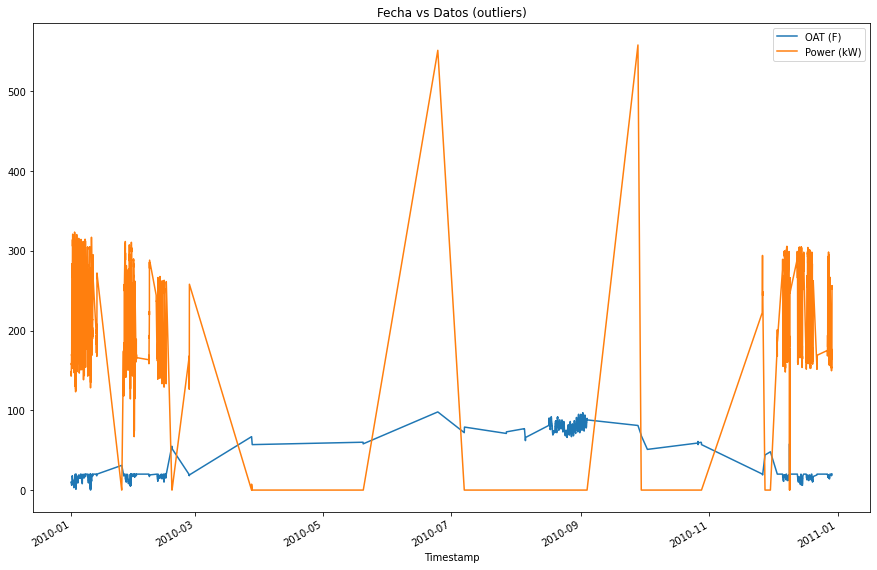

In [20]:
outliers2=outliers2.any(axis=1)
BD_sucio2=BD[outliers2]
BD_sucio2.plot(figsize=(15,10),title="Fecha vs Datos (outliers)")
plt.show()

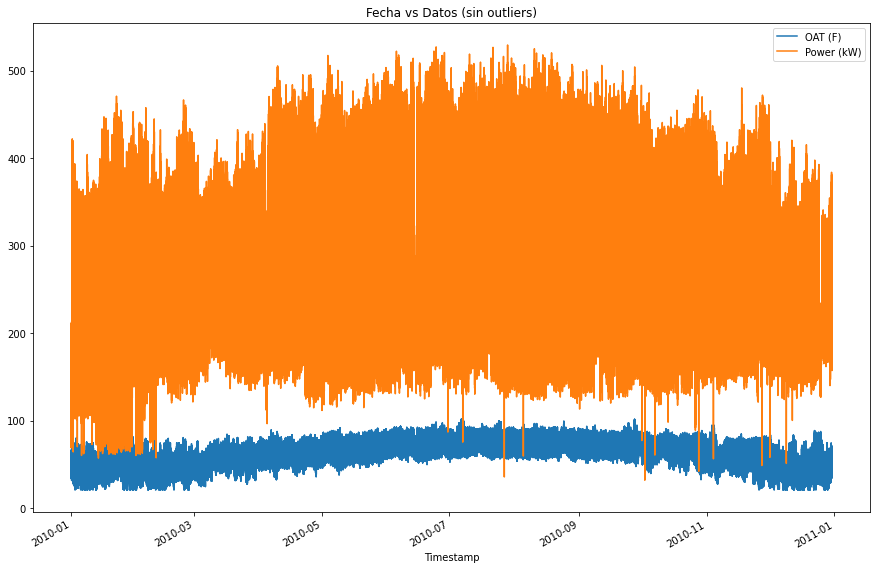

In [21]:
BD_limpio2=BD[~outliers2] #los que son True corresponden a los datos correctos
BD_limpio2.plot(figsize=(15,10),title="Fecha vs Datos (sin outliers)")
plt.show()

In [22]:
print("Dataframe sin outliers \n",BD_limpio2)
print("Dataframe con outliers \n",BD_sucio2)

Dataframe sin outliers 
                      OAT (F)  Power (kW)
Timestamp                               
2010-01-01 01:15:00       51       165.1
2010-01-01 01:30:00       51       151.6
2010-01-01 01:45:00       51       146.9
2010-01-01 02:00:00       51       153.7
2010-01-01 02:15:00       51       153.8
...                      ...         ...
2010-12-30 23:00:00       67       333.7
2010-12-30 23:15:00       68       221.0
2010-12-30 23:30:00       68       235.7
2010-12-30 23:45:00       68       227.2
2010-12-31 00:00:00       68       234.5

[169914 rows x 2 columns]
Dataframe con outliers 
                      OAT (F)  Power (kW)
Timestamp                               
2010-02-18 00:00:00       55         0.0
2010-02-18 00:15:00       54         0.0
2010-02-18 00:30:00       54         0.0
2010-02-18 00:45:00       54         0.0
2010-02-18 01:00:00       54         0.0
...                      ...         ...
2010-12-29 08:15:00       20       245.8
2010-12-29 08:30:00  

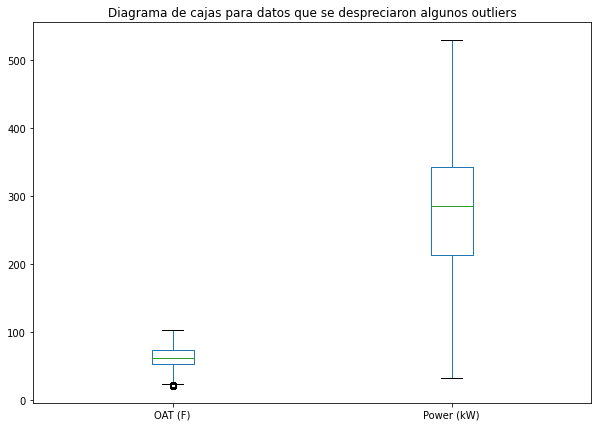

In [23]:
BD_limpio2.plot(kind="box",figsize=(10,7),title="Diagrama de cajas para datos que se despreciaron algunos outliers")
plt.show()

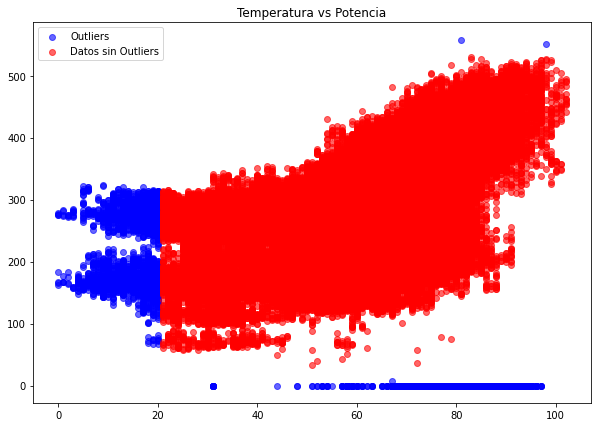

In [24]:
#Grafica de temperatura vs potencia
plt.figure(figsize=(10,7))
plt.title("Temperatura vs Potencia")
plt.scatter(BD_sucio2["OAT (F)"],BD_sucio2["Power (kW)"],color="blue", alpha=0.6,label="Outliers")
plt.scatter(BD_limpio2["OAT (F)"],BD_limpio2["Power (kW)"],color="red", alpha=0.6,label="Datos sin Outliers")
plt.legend()
plt.show()

___

## Comportamiento de como varia la temperatura y la potencia en 4 dias consecutivos

**Dataset 1**

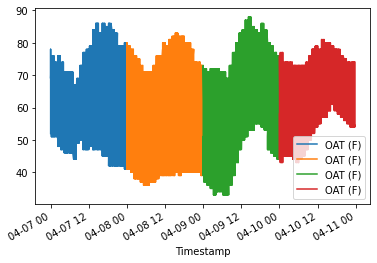

In [25]:
fig, ax = plt.subplots()
BD_limpio1.loc['2010-04-07', ['OAT (F)']].plot(ax=ax)
BD_limpio1.loc['2010-04-08', ['OAT (F)']].plot(ax=ax)
BD_limpio1.loc['2010-04-09', ['OAT (F)']].plot(ax=ax)
BD_limpio1.loc['2010-04-10', ['OAT (F)']].plot(ax=ax)
plt.legend()
plt.show()

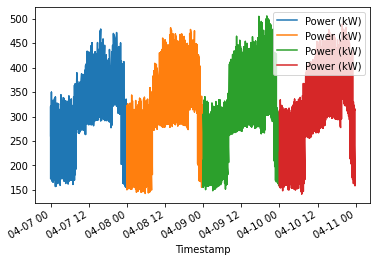

In [26]:
fig, ax = plt.subplots()
BD_limpio1.loc['2010-04-07', ['Power (kW)']].plot(ax=ax)
BD_limpio1.loc['2010-04-08', ['Power (kW)']].plot(ax=ax)
BD_limpio1.loc['2010-04-09', ['Power (kW)']].plot(ax=ax)
BD_limpio1.loc['2010-04-10', ['Power (kW)']].plot(ax=ax)
plt.legend()
plt.show()

**Dataset 2**

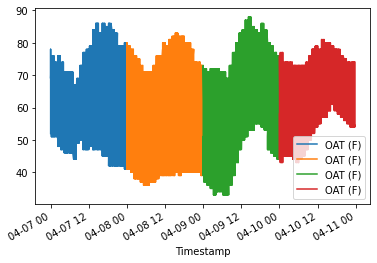

In [27]:
fig, ax = plt.subplots()
BD_limpio2.loc['2010-04-07', ['OAT (F)']].plot(ax=ax)
BD_limpio2.loc['2010-04-08', ['OAT (F)']].plot(ax=ax)
BD_limpio2.loc['2010-04-09', ['OAT (F)']].plot(ax=ax)
BD_limpio2.loc['2010-04-10', ['OAT (F)']].plot(ax=ax)
plt.legend()
plt.show()

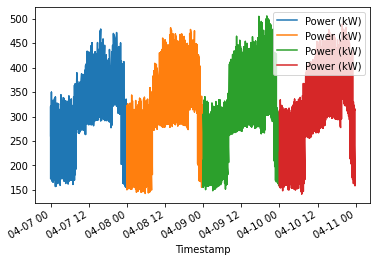

In [28]:
fig, ax = plt.subplots()
BD_limpio2.loc['2010-04-07', ['Power (kW)']].plot(ax=ax)
BD_limpio2.loc['2010-04-08', ['Power (kW)']].plot(ax=ax)
BD_limpio2.loc['2010-04-09', ['Power (kW)']].plot(ax=ax)
BD_limpio2.loc['2010-04-10', ['Power (kW)']].plot(ax=ax)
plt.legend()
plt.show()

De las graficas anteriores podemos observar un comportamiento similar de la temperatura y la potencia para los 4 dias consecutivos

<a name=item5></a>
## Primer entrenamiento

**Dataset 1**

In [29]:
X1 = pd.DataFrame(BD_limpio1['OAT (F)'])
y1 = pd.DataFrame(BD_limpio1['Power (kW)'])
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [30]:
linear_regression = LinearRegression()
linear_regression.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
linear_regression.coef_

array([[3.11822055]])

In [32]:
linear_regression.intercept_

array([92.76384558])

In [33]:
scoreMI=linear_regression.score(X_test1,y_test1)
print("puntaje de modelo inicial",scoreMI)

puntaje de modelo inicial 0.34501886721900854


**Dataset 1 Entrenamiento**

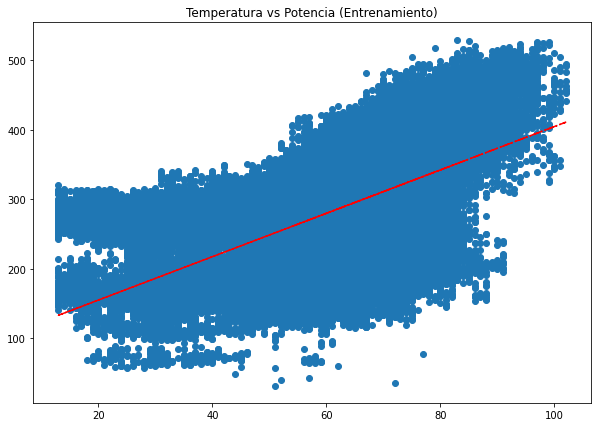

In [34]:
y_pred1 = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X_train1.values.flatten()
plt.figure(figsize=(10,7))
plt.title("Temperatura vs Potencia (Entrenamiento)")
# dibujar los datos
plt.plot(X_train1.values.flatten(),y_train1.values.flatten(),'o')
# dibujar recta estimada
plt.plot(X_train1.values.flatten(), y_pred1, '-.r')
plt.show()

**Dataset 1 Testeo**

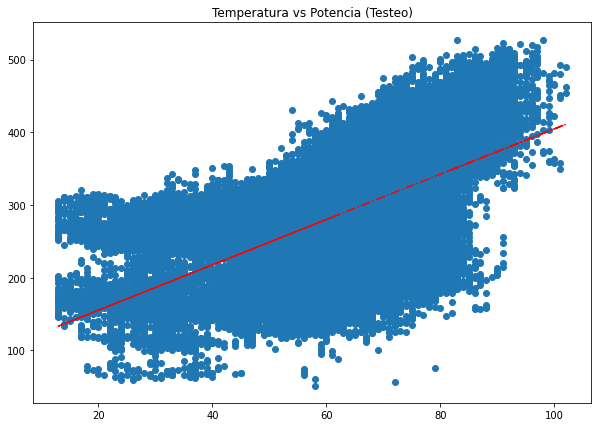

In [35]:
y_pred1 = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X_test1.values.flatten()
plt.figure(figsize=(10,7))
plt.title("Temperatura vs Potencia (Testeo)")
# dibujar los datos
plt.plot(X_test1.values.flatten(),y_test1.values.flatten(),'o')
# dibujar recta estimada
plt.plot(X_test1.values.flatten(), y_pred1, '-.r')
plt.show()

**Dataset 2**

In [36]:
X2 = pd.DataFrame(BD_limpio2['OAT (F)'])
y2 = pd.DataFrame(BD_limpio2['Power (kW)'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [37]:
linear_regression = LinearRegression()
linear_regression.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
linear_regression.coef_

array([[3.31314013]])

In [39]:
linear_regression.intercept_

array([79.85631995])

In [40]:
linear_regression.score(X_test2,y_test2)

0.35109431965276755

**Dataset 2 Entrenamiento**

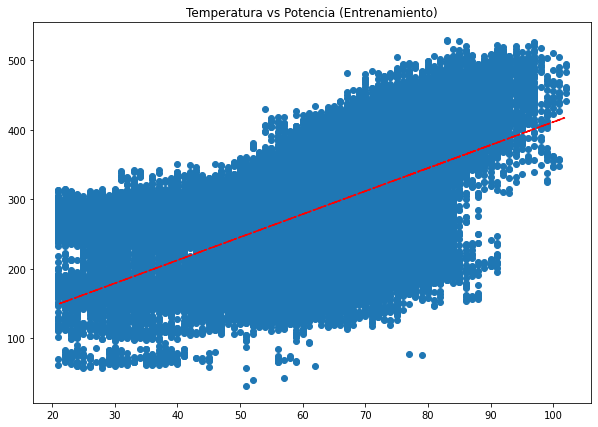

In [41]:
y_pred2 = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X_train2.values.flatten()
plt.figure(figsize=(10,7))
plt.title("Temperatura vs Potencia (Entrenamiento)")
# dibujar los datos
plt.plot(X_train2.values.flatten(),y_train2.values.flatten(),'o')
# dibujar recta estimada
plt.plot(X_train2.values.flatten(), y_pred2, '-.r')
plt.show()

**Dataset 2 Testeo**

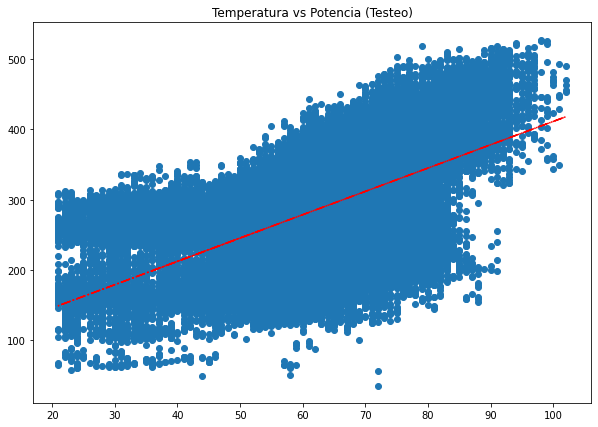

In [42]:
y_pred2 = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X_test2.values.flatten()
plt.figure(figsize=(10,7))
plt.title("Temperatura vs Potencia (Testeo)")
# dibujar los datos
plt.plot(X_test2.values.flatten(),y_test2.values.flatten(),'o')
# dibujar recta estimada
plt.plot(X_test2.values.flatten(), y_pred2, '-.r')
plt.show()

<a name=item6></a>
## Agregando predictores al Dataset 2

**Agregamos la hora como predictor**

In [43]:
BD_limpio1=BD_limpio1.copy()
BD_limpio1['hour']=BD_limpio1.index.hour
BD_limpio1

,OAT (F),Power (kW),hour
Timestamp,,,
2010-01-01 01:15:00,51,165.1,1
2010-01-01 01:30:00,51,151.6,1
2010-01-01 01:45:00,51,146.9,1
2010-01-01 02:00:00,51,153.7,2
2010-01-01 02:15:00,51,153.8,2
...,...,...,...
2010-12-30 23:00:00,67,333.7,23
2010-12-30 23:15:00,68,221.0,23
2010-12-30 23:30:00,68,235.7,23


In [44]:
X = pd.DataFrame(BD_limpio1[['OAT (F)','hour']])
y = pd.DataFrame(BD_limpio1['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.5871809424238135

In [45]:
linear_regression.coef_

array([[2.74478969, 6.09480116]])

In [46]:
linear_regression.intercept_

array([45.38166501])

**Dataset 1 Entrenamiento**

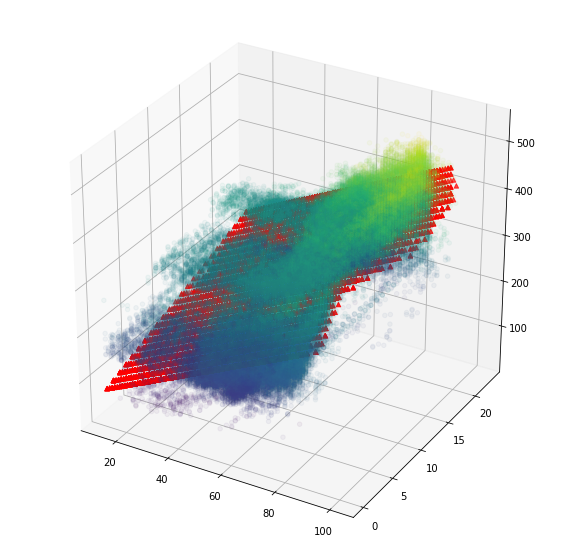

In [47]:
y_pred = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X_train['OAT (F)'].values.flatten() + linear_regression.coef_[0][1] * X_train['hour'].values.flatten()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['OAT (F)'], X_train['hour'], y_pred, c="red",marker="^")
ax.scatter(X_train['OAT (F)'], X_train['hour'], y_train, c=y_train, cmap='viridis',alpha=0.05)
plt.show()

**Dataset 1 Testeo**

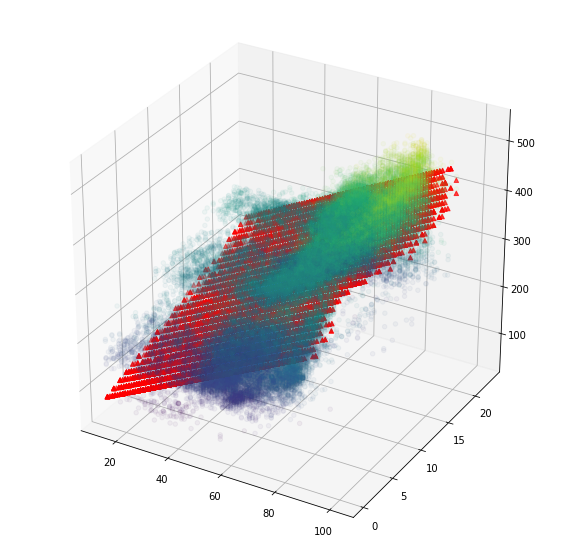

In [48]:
y_pred = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X_test['OAT (F)'].values.flatten() + linear_regression.coef_[0][1] * X_test['hour'].values.flatten()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['OAT (F)'], X_test['hour'], y_pred, c="red",marker="^" )
ax.scatter(X_test['OAT (F)'], X_test['hour'], y_test, c=y_test, cmap='viridis',alpha=0.05)
plt.show()

<a name=item7></a>
## Experimento: Agregamos la hora de abierto y cerrado como variable categorica

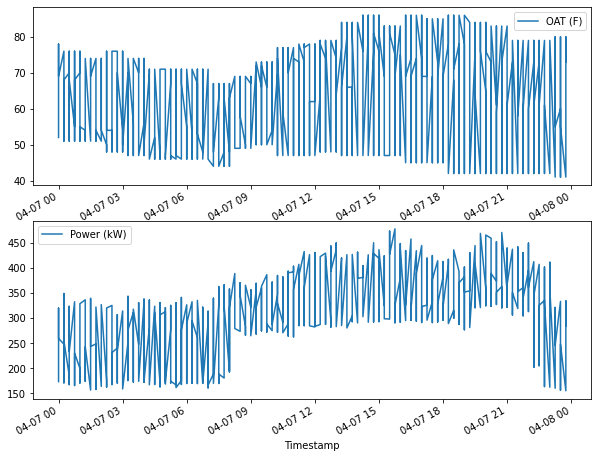

In [49]:
fig, axs = plt.subplots(2)
BD_limpio1.loc['2010-04-07', ['OAT (F)']].plot(ax=axs[0],figsize=(10,8))
BD_limpio1.loc['2010-04-07', ['Power (kW)']].plot(ax=axs[1],figsize=(10,8))
plt.show()

Vamos a crear una característica cualitativa relacionada con el estado de las tiendas: abierto o cerrado.

Vamos a sumir que si la tienda está abierta la nueva característica tendrá un valor de 1, de lo contrario será 0

¿Cuál es el horario de apertura de la tienda? 9h a 21h 

In [50]:
BD_limpio1=BD_limpio1.copy()
BD_limpio1['open_hours'] = np.where((BD_limpio1.index.hour >= 9) & (BD_limpio1.index.hour <= 21),1,0)
BD_limpio1

,OAT (F),Power (kW),hour,open_hours
Timestamp,,,,
2010-01-01 01:15:00,51,165.1,1,0
2010-01-01 01:30:00,51,151.6,1,0
2010-01-01 01:45:00,51,146.9,1,0
2010-01-01 02:00:00,51,153.7,2,0
2010-01-01 02:15:00,51,153.8,2,0
...,...,...,...,...
2010-12-30 23:00:00,67,333.7,23,0
2010-12-30 23:15:00,68,221.0,23,0
2010-12-30 23:30:00,68,235.7,23,0


In [51]:
X = pd.DataFrame(BD_limpio1[['OAT (F)','hour','open_hours']])
y = pd.DataFrame(BD_limpio1['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.6977318368830333

In [52]:
linear_regression.coef_

array([[ 2.45306894,  3.4532472 , 69.34523871]])

## Añadiendo como predictor los meses

In [53]:
BD_limpio1=BD_limpio1.copy()
BD_limpio1['meses']=BD_limpio1.index.month
BD_limpio1

,OAT (F),Power (kW),hour,open_hours,meses
Timestamp,,,,,
2010-01-01 01:15:00,51,165.1,1,0,1
2010-01-01 01:30:00,51,151.6,1,0,1
2010-01-01 01:45:00,51,146.9,1,0,1
2010-01-01 02:00:00,51,153.7,2,0,1
2010-01-01 02:15:00,51,153.8,2,0,1
...,...,...,...,...,...
2010-12-30 23:00:00,67,333.7,23,0,12
2010-12-30 23:15:00,68,221.0,23,0,12
2010-12-30 23:30:00,68,235.7,23,0,12


In [54]:
X = pd.DataFrame(BD_limpio1[['OAT (F)','hour','open_hours','meses']])
y = pd.DataFrame(BD_limpio1['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.6977552352879491

In [55]:
linear_regression.coef_

array([[ 2.44871045,  3.45396397, 69.3707561 ,  0.1195527 ]])

## Experimento: Agregamos (primavera-verano-otoño) e invierno como variable categorica

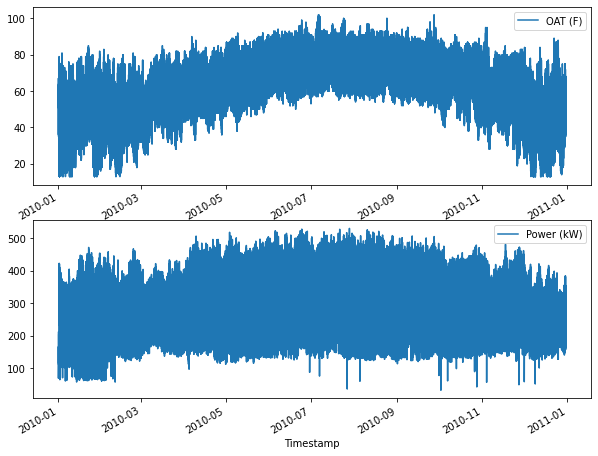

In [56]:
fig, axs = plt.subplots(2)
BD_limpio1.loc['2010', ['OAT (F)']].plot(ax=axs[0],figsize=(10,8))
BD_limpio1.loc['2010', ['Power (kW)']].plot(ax=axs[1],figsize=(10,8))

Vamos a crear una característica cualitativa relacionada con las estaciones en un año: 

Deacuerdo con las graficas anteriores vamos asumir que las 3 estaciones primavera-verano-otoño (meses 3 al 12) las podemos categorizar con el numero 1 de mayor consumo (ventiladores, aire acondicionado encendido etc.) y los meses de mayor invierno (enerfo-febrero) con el numero 0 de menor consumo.

In [57]:
BD_limpio1=BD_limpio1.copy()
BD_limpio1['2 grupos de estac'] = np.where((BD_limpio1.index.month >= 3) & (BD_limpio1.index.month <= 12),1,0)
BD_limpio1

,OAT (F),Power (kW),hour,open_hours,meses,2 grupos de estac
Timestamp,,,,,,
2010-01-01 01:15:00,51,165.1,1,0,1,0
2010-01-01 01:30:00,51,151.6,1,0,1,0
2010-01-01 01:45:00,51,146.9,1,0,1,0
2010-01-01 02:00:00,51,153.7,2,0,1,0
2010-01-01 02:15:00,51,153.8,2,0,1,0
...,...,...,...,...,...,...
2010-12-30 23:00:00,67,333.7,23,0,12,1
2010-12-30 23:15:00,68,221.0,23,0,12,1
2010-12-30 23:30:00,68,235.7,23,0,12,1


In [58]:
X = pd.DataFrame(BD_limpio1[['OAT (F)','hour','open_hours','meses','2 grupos de estac']])
y = pd.DataFrame(BD_limpio1['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.6979168582314945

In [59]:
linear_regression.coef_

array([[ 2.40757246,  3.45836414, 69.62576201, -0.23817029,  5.69404285]])

Deacuerdo con lo anterior y observando los puntajes obtenidos, podemos optar por quedarnos con las caracteristicas de **temperatura**, **horas**, **horas abierto** y **2 grupos de estac**,  los cuales tienen unos pesos de **2.40757246,  3.45836414, 69.62576201,  5.69404285** respectivamente.
En otras palabras la variable **meses** no esvaliosa para la prediccion.

<a name=item8></a>
## Modelo final

In [60]:
BD_limpio1

,OAT (F),Power (kW),hour,open_hours,meses,2 grupos de estac
Timestamp,,,,,,
2010-01-01 01:15:00,51,165.1,1,0,1,0
2010-01-01 01:30:00,51,151.6,1,0,1,0
2010-01-01 01:45:00,51,146.9,1,0,1,0
2010-01-01 02:00:00,51,153.7,2,0,1,0
2010-01-01 02:15:00,51,153.8,2,0,1,0
...,...,...,...,...,...,...
2010-12-30 23:00:00,67,333.7,23,0,12,1
2010-12-30 23:15:00,68,221.0,23,0,12,1
2010-12-30 23:30:00,68,235.7,23,0,12,1


Deacuerdo con lo desarrollado anteriormente para el modelo final vamos a considerar solo 4 predictores:

$X_1=$ Temperatura (cuantitativa)

$X_2=$ hora (cuantitativa)

$X_3=$ hora de abierto o cerrado (cualitativa)

$X_4=$ 2 grupos de estacion con: grupo 1 (primavera-verano-otoño), grupo 2 (invierno) (cualitativa)

De manera que el modelo de regresion lineal escogido es:


$$\hat Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3+ \beta_4 X_4$$

In [61]:
Xfinal = pd.DataFrame(BD_limpio1[['OAT (F)','hour','open_hours','2 grupos de estac']])
yfinal = pd.DataFrame(BD_limpio1['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(Xfinal, yfinal, test_size=0.33, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
linear_regression.coef_

array([[ 2.41339019,  3.4580404 , 69.58791209,  4.17008373]])

In [62]:
scoreMF=linear_regression.score(X_test,y_test)
print("puntaje final",scoreMF)

puntaje final 0.697900569331489


In [63]:
porcentajedif=100-scoreMI*100/scoreMF
print("Incremento porcental del modelo final respecto al modelo inicial =",porcentajedif)

Incremento porcental del modelo final respecto al modelo inicial = 50.56332056735558
